In [519]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import general_functions as gf

import statsmodels.api as sm
from statsmodels.formula.api import ols, mixedlm

pd.set_option("display.max_rows", 200)

In [520]:
f1data = pd.read_csv("f1_results_data.csv")

In [521]:
f1data.head()

,resultId,raceId,driverId,constructorId,driverName,constructorName,tbl,overallTimeMsec,fastestLapTimeMsec,fastestLapSpeed,position,win,laps,finishedRace,date,year,month,day
0,1,18,1,1,Lewis Hamilton,McLaren,0.0,5690616.0,87452.0,218.300,1.0,1,58,1,2008-03-16,2008,3,16
1,2,18,2,2,Nick Heidfeld,BMW Sauber,5478.0,5696094.0,87739.0,217.586,2.0,0,58,1,2008-03-16,2008,3,16
2,3,18,3,3,Nico Rosberg,Williams,8163.0,5698779.0,88090.0,216.719,3.0,0,58,1,2008-03-16,2008,3,16
3,4,18,4,4,Fernando Alonso,Renault,17181.0,5707797.0,88603.0,215.464,4.0,0,58,1,2008-03-16,2008,3,16
4,5,18,5,1,Heikki Kovalainen,McLaren,18014.0,5708630.0,87418.0,218.385,5.0,0,58,1,2008-03-16,2008,3,16


In [522]:
f1data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26739 entries, 0 to 26738
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   resultId            26739 non-null  int64  
 1   raceId              26739 non-null  int64  
 2   driverId            26739 non-null  int64  
 3   constructorId       26739 non-null  int64  
 4   driverName          26739 non-null  object 
 5   constructorName     26739 non-null  object 
 6   tbl                 7670 non-null   float64
 7   overallTimeMsec     7670 non-null   float64
 8   fastestLapTimeMsec  8217 non-null   float64
 9   fastestLapSpeed     8233 non-null   float64
 10  position            15789 non-null  float64
 11  win                 26739 non-null  int64  
 12  laps                26739 non-null  int64  
 13  finishedRace        26739 non-null  int64  
 14  date                26739 non-null  object 
 15  year                26739 non-null  int64  
 16  mont

In [523]:
f1data["year"].nunique()

75

In [524]:
drivers = pd.DataFrame(
    f1data.groupby(["driverId", "driverName"]).agg(
        average_tbl = ("tbl", "mean"),
        total_races = ("constructorId", "count"),
        total_finished_races = ("finishedRace", "sum"),
        finish_rate = ("finishedRace", "mean"),
        total_wins = ("win", "sum"),
        win_rate = ("win", "mean"),
        average_position = ("position", "mean"),
        unique_constructors = ("constructorId", "nunique")
    )
)

In [525]:
drivers.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 860 entries, (1, 'Lewis Hamilton') to (861, 'Franco Colapinto')
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   average_tbl           331 non-null    float64
 1   total_races           860 non-null    int64  
 2   total_finished_races  860 non-null    int64  
 3   finish_rate           860 non-null    float64
 4   total_wins            860 non-null    int64  
 5   win_rate              860 non-null    float64
 6   average_position      658 non-null    float64
 7   unique_constructors   860 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 70.7+ KB


In [526]:
drivers.sort_values("total_wins", ascending = False)

,,average_tbl,total_races,total_finished_races,finish_rate,total_wins,win_rate,average_position,unique_constructors
driverId,driverName,,,,,,,,
1,Lewis Hamilton,17469.305466,355,311,0.876056,105,0.295775,3.643077,2
30,Michael Schumacher,18498.269406,308,219,0.711039,91,0.295455,3.701245,4
830,Max Verstappen,17934.532544,208,169,0.812500,63,0.302885,3.533708,2
20,Sebastian Vettel,23595.137168,300,226,0.753333,53,0.176667,5.282443,5
117,Alain Prost,19983.075630,202,119,0.589109,51,0.252475,2.958042,4
...,...,...,...,...,...,...,...,...,...
325,Carlo Facetti,NaN,1,0,0.000000,0,0.000000,NaN,1
326,Eppie Wietzes,NaN,2,0,0.000000,0,0.000000,NaN,2
329,Mike Beuttler,310700.000000,29,1,0.034483,0,0.000000,11.461538,2


In [527]:
drivers["unique_constructors"].mean()

2.4988372093023257

In [528]:
constructors = pd.DataFrame(
    f1data.groupby("constructorName").agg(
        average_tbl = ("tbl", "mean"),
        total_races = ("constructorId", "count"),
        total_finished_races = ("finishedRace", "sum"),
        finish_rate = ("finishedRace", "mean"),
        total_wins = ("win", "sum"),
        win_rate = ("win", "mean"),
        average_position = ("position", "mean"),
        unique_drivers = ("driverId", "nunique")
        ))

constructors.head()

,average_tbl,total_races,total_finished_races,finish_rate,total_wins,win_rate,average_position,unique_drivers
constructorName,,,,,,,,
AFM,NaN,7,0,0.000000,0,0.00000,11.500000,5
AGS,NaN,123,0,0.000000,0,0.00000,10.227273,10
ATS,105164.500000,162,2,0.012346,0,0.00000,10.444444,16
Adams,NaN,2,0,0.000000,0,0.00000,NaN,2
Alfa Romeo,48933.099099,451,111,0.246120,11,0.02439,10.650177,23


In [529]:
constructors.sort_values("total_wins", ascending = False)

,average_tbl,total_races,total_finished_races,finish_rate,total_wins,win_rate,average_position,unique_drivers
constructorName,,,,,,,,
Ferrari,34677.476876,2437,1319,0.541239,249,0.102175,4.664582,98
McLaren,32132.364004,1921,989,0.514836,184,0.095783,5.927128,55
Mercedes,31626.000000,650,533,0.820000,129,0.198462,4.379549,12
Red Bull,25789.232394,786,568,0.722646,122,0.155216,5.133333,12
Williams,39823.777929,1674,734,0.438471,114,0.068100,8.253916,62
...,...,...,...,...,...,...,...,...
Fry,NaN,1,0,0.000000,0,0.000000,NaN,1
Gilby,NaN,7,0,0.000000,0,0.000000,15.000000,2
Gordini,268400.000000,102,1,0.009804,0,0.000000,7.153846,23


In [530]:
constructors_no_na = constructors[constructors["average_tbl"].notna()]

constructors_no_na.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96 entries, ATS to Wolf
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   average_tbl           96 non-null     float64
 1   total_races           96 non-null     int64  
 2   total_finished_races  96 non-null     int64  
 3   finish_rate           96 non-null     float64
 4   total_wins            96 non-null     int64  
 5   win_rate              96 non-null     float64
 6   average_position      96 non-null     float64
 7   unique_drivers        96 non-null     int64  
dtypes: float64(4), int64(4)
memory usage: 6.8+ KB


In [531]:
constructors = constructors.sort_values(by = ["average_position"], ascending = True)
constructors

,average_tbl,total_races,total_finished_races,finish_rate,total_wins,win_rate,average_position,unique_drivers
constructorName,,,,,,,,
Matra-Ford,23262.000000,40,15,0.375000,9,0.225000,3.655172,3
Brabham-Repco,43645.217391,77,23,0.298701,8,0.103896,3.871795,11
Brawn,23378.656250,34,32,0.941176,8,0.235294,4.062500,2
Vanwall,37246.666667,71,15,0.211268,10,0.140845,4.185185,12
Lancia,20200.000000,11,1,0.090909,0,0.000000,4.333333,4
...,...,...,...,...,...,...,...,...
Shannon,NaN,1,0,0.000000,0,0.000000,NaN,1
Snowberger,NaN,1,0,0.000000,0,0.000000,NaN,1
Sutton,NaN,1,0,0.000000,0,0.000000,NaN,1


In [532]:
constructors = constructors[constructors["total_finished_races"] > 0]
constructors.count()

average_tbl             96
total_races             96
total_finished_races    96
finish_rate             96
total_wins              96
win_rate                96
average_position        96
unique_drivers          96
dtype: int64

In [533]:
constructors["total_finished_races"].mean()

79.89583333333333

In [534]:
test_data = f1data[["driverId", "driverName", "constructorName", "tbl"]]
test_data = test_data.dropna()
test_data.sort_values("driverName")

,driverId,driverName,constructorName,tbl
683,16,Adrian Sutil,Spyker,60129.0
20517,16,Adrian Sutil,Force India,30168.0
21715,16,Adrian Sutil,Force India,65068.0
21897,16,Adrian Sutil,Force India,57738.0
20543,16,Adrian Sutil,Force India,40932.0
...,...,...,...,...
7259,103,Éric Bernard,Larrousse,75302.0
7331,103,Éric Bernard,Larrousse,84308.0
5360,103,Éric Bernard,Ligier,65421.0
5363,100,Érik Comas,Larrousse,105445.0


In [535]:
test_data["constructorName"].nunique()

96

In [536]:
test_data["driverName"].nunique()

331

In [537]:
top_5_drivers = drivers.nlargest(5, "total_wins")
top_5_drivers = top_5_drivers.reset_index()
top_5_drivers = top_5_drivers[["driverName", "total_races", "total_finished_races", "total_wins"]]
top_5_drivers = top_5_drivers.rename(columns = {"driverName": "Driver", "total_races": "Total Races", "total_finished_races": "Total Finished Races", "total_wins": "Total Wins"})

top_5_drivers

,Driver,Total Races,Total Finished Races,Total Wins
0,Lewis Hamilton,355,311,105
1,Michael Schumacher,308,219,91
2,Max Verstappen,208,169,63
3,Sebastian Vettel,300,226,53
4,Alain Prost,202,119,51


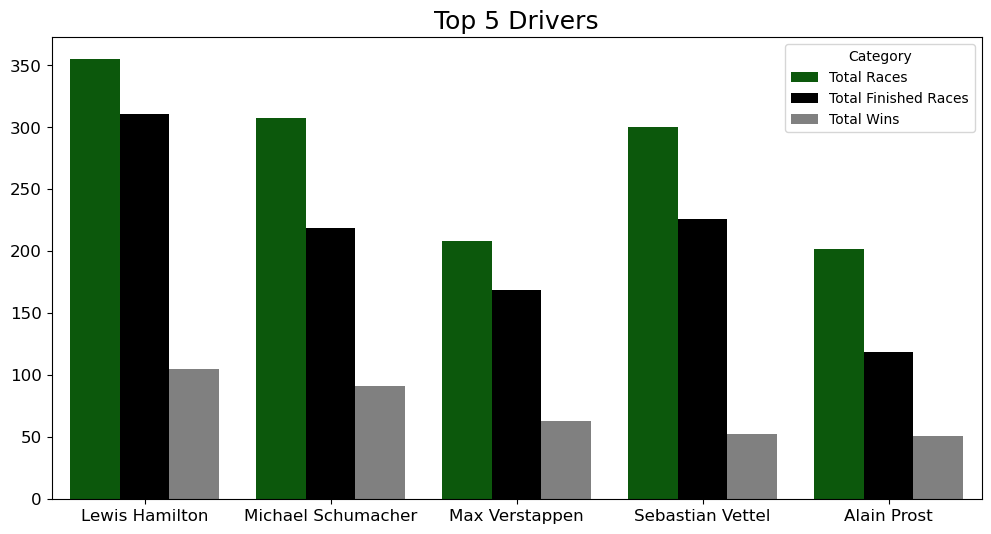

In [538]:
top_5_drivers_long = top_5_drivers.melt(id_vars = "Driver",
                                        value_vars = ["Total Races", "Total Finished Races", "Total Wins"],
                                        var_name = "Category",
                                        value_name = "Total"
                                        )

plt.figure(figsize = (12, 6))

sns.barplot(data = top_5_drivers_long, x = "Driver", y = "Total", hue = "Category", palette = ["darkgreen", "black", "gray"])
plt.title("Top 5 Drivers", fontsize = 18)
plt.xlabel("")
plt.ylabel("")
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.savefig("top-5-drivers.png")

In [539]:
top_5_constructors = constructors.nlargest(5, "total_wins")
top_5_constructors = top_5_constructors.reset_index()
top_5_constructors = top_5_constructors[["constructorName", "total_races", "total_finished_races", "total_wins"]]
top_5_constructors = top_5_constructors.rename(columns = {"constructorName": "Constructor", "total_races": "Total Races", "total_finished_races": "Total Finished Races", "total_wins": "Total Wins"})

top_5_constructors

,Constructor,Total Races,Total Finished Races,Total Wins
0,Ferrari,2437,1319,249
1,McLaren,1921,989,184
2,Mercedes,650,533,129
3,Red Bull,786,568,122
4,Williams,1674,734,114


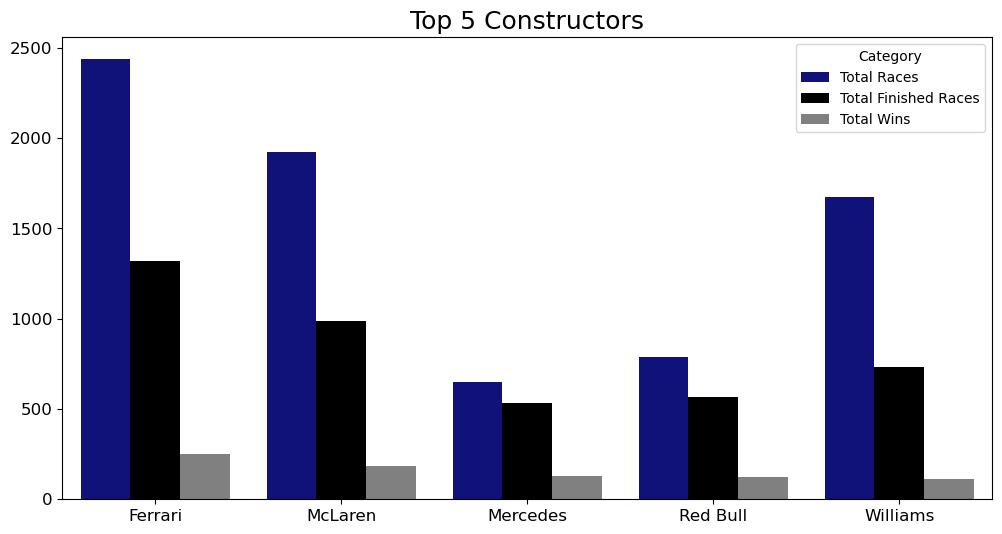

In [540]:
top_5_constructors_long = top_5_constructors.melt(id_vars = "Constructor",
                                        value_vars = ["Total Races", "Total Finished Races", "Total Wins"],
                                        var_name = "Category",
                                        value_name = "Total"
                                        )

plt.figure(figsize = (12, 6))

sns.barplot(data = top_5_constructors_long, x = "Constructor", y = "Total", hue = "Category", palette = ["darkblue", "black", "gray"])
plt.title("Top 5 Constructors", fontsize = 18)
plt.xlabel("")
plt.ylabel("")
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.savefig("top-5-constructors.png")

In [541]:
year_data = pd.DataFrame(
    f1data.groupby(["year"]).agg(
        total_races = ("raceId", "nunique"),
        total_drivers = ("driverId", "nunique"),
        total_constructors = ("constructorId", "nunique"),
        avg_fastest_lap_speed = ("fastestLapSpeed", "mean"),
        fastest_lap_speed = ("fastestLapSpeed", "max"),
        avg_laps_per_race = ("laps", "mean"),
        races_finished = ("finishedRace", "mean")
    )
)

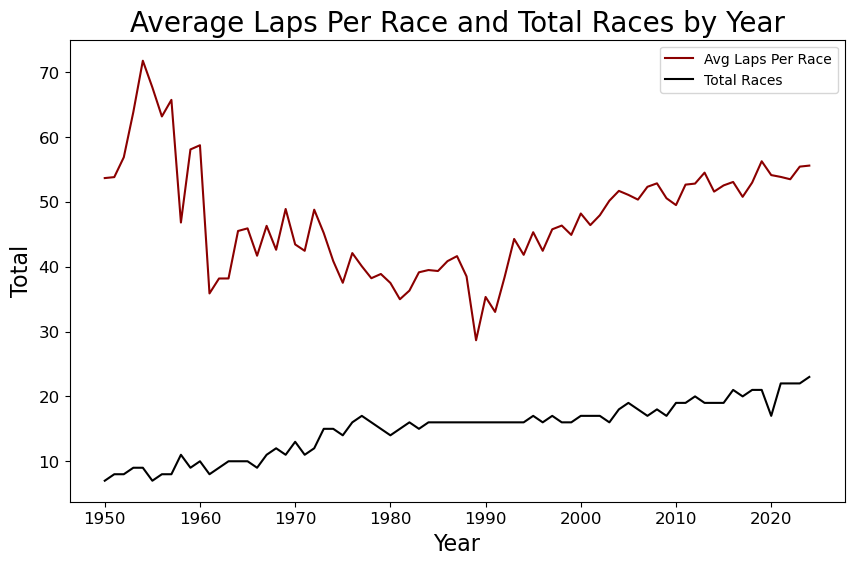

In [542]:
plt.figure(figsize = (10, 6))

ax = sns.lineplot(x = year_data.index, y = year_data["avg_laps_per_race"], label = "Avg Laps Per Race", color = "darkred")
sns.lineplot(x = year_data.index, y = year_data["total_races"], label = "Total Races", color = "black")
ax.legend()
ax.set_title("Average Laps Per Race and Total Races by Year", fontsize = 20)
ax.set_xlabel("Year", fontsize = 16)
ax.set_ylabel("Total", fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.savefig("avg-laps-total-races.png")

plt.show()

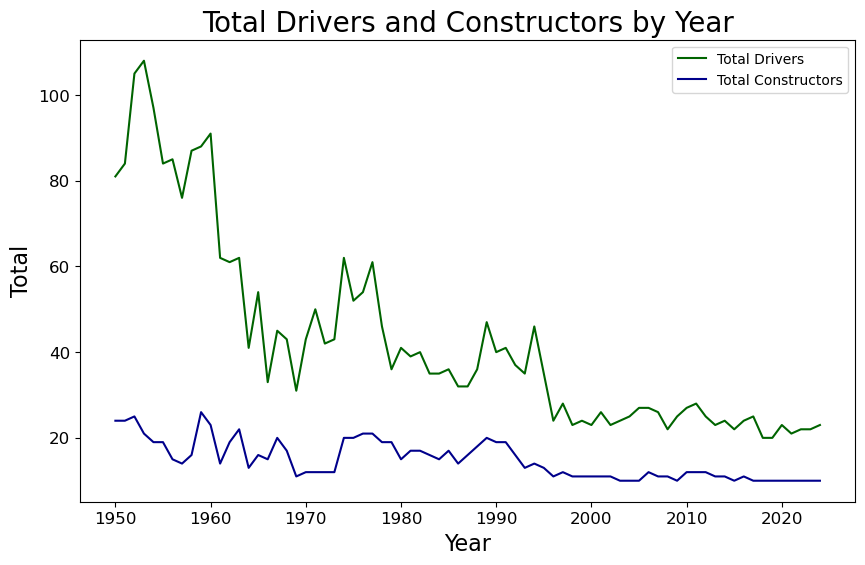

In [543]:
plt.figure(figsize = (10, 6))

ax = sns.lineplot(x = year_data.index, y = year_data["total_drivers"], label = "Total Drivers", color = "darkgreen")
sns.lineplot(x = year_data.index, y = year_data["total_constructors"], label = "Total Constructors", color = "darkblue")
ax.legend()
ax.set_title("Total Drivers and Constructors by Year", fontsize = 20)
ax.set_xlabel("Year", fontsize = 16)
ax.set_ylabel("Total", fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.savefig("total-drivers-constructors.png")

plt.show()

In [544]:
drivers_no_na = drivers[drivers["average_tbl"].notna()]
constructors_no_na = constructors[constructors["average_tbl"].notna()]

In [545]:
drivers_no_na.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 331 entries, (1, 'Lewis Hamilton') to (861, 'Franco Colapinto')
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   average_tbl           331 non-null    float64
 1   total_races           331 non-null    int64  
 2   total_finished_races  331 non-null    int64  
 3   finish_rate           331 non-null    float64
 4   total_wins            331 non-null    int64  
 5   win_rate              331 non-null    float64
 6   average_position      331 non-null    float64
 7   unique_constructors   331 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 35.5+ KB


In [546]:
constructors_no_na.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96 entries, Matra-Ford to HRT
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   average_tbl           96 non-null     float64
 1   total_races           96 non-null     int64  
 2   total_finished_races  96 non-null     int64  
 3   finish_rate           96 non-null     float64
 4   total_wins            96 non-null     int64  
 5   win_rate              96 non-null     float64
 6   average_position      96 non-null     float64
 7   unique_drivers        96 non-null     int64  
dtypes: float64(4), int64(4)
memory usage: 6.8+ KB


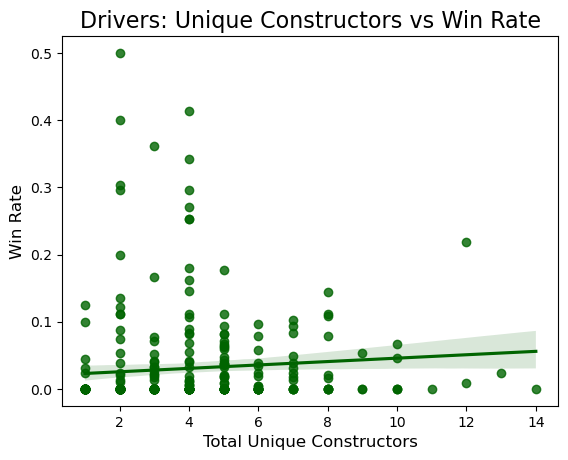

In [547]:
sns.regplot(data = drivers_no_na, x = "unique_constructors", y = "win_rate", color = "darkgreen")

plt.title("Drivers: Unique Constructors vs Win Rate", fontsize = 16)
plt.xlabel("Total Unique Constructors", fontsize = 12)
plt.ylabel("Win Rate", fontsize = 12)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.savefig("unique-constructors-vs-win-rate.png")

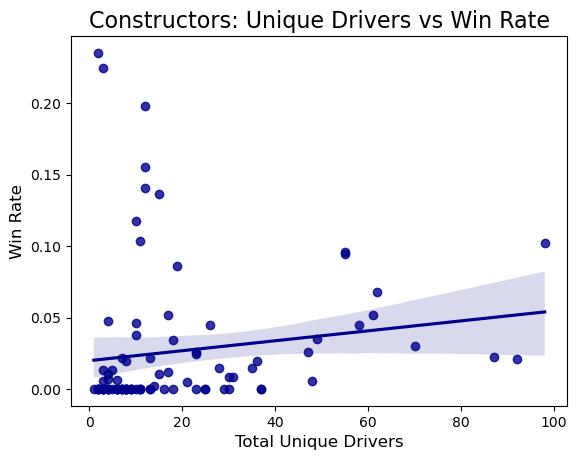

In [548]:
sns.regplot(data = constructors_no_na, x = "unique_drivers", y = "win_rate", color = "darkblue")

plt.title("Constructors: Unique Drivers vs Win Rate", fontsize = 16)
plt.xlabel("Total Unique Drivers", fontsize = 12)
plt.ylabel("Win Rate", fontsize = 12)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.savefig("unique-drivers-vs-win-rate.png")

In [549]:
f1_mixed_effects_data = pd.DataFrame(f1data[["raceId", "constructorId", "driverId", "tbl"]])

f1_mixed_effects_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26739 entries, 0 to 26738
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   raceId         26739 non-null  int64  
 1   constructorId  26739 non-null  int64  
 2   driverId       26739 non-null  int64  
 3   tbl            7670 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 835.7 KB


In [550]:
f1_mixed_effects_data = f1_mixed_effects_data.dropna(subset = ["tbl"])

f1_mixed_effects_data = f1_mixed_effects_data.rename(columns = {
    "constructorId": "Constructor",
    "driverId": "Driver"
})

f1_mixed_effects_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7670 entries, 0 to 26732
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   raceId       7670 non-null   int64  
 1   Constructor  7670 non-null   int64  
 2   Driver       7670 non-null   int64  
 3   tbl          7670 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 299.6 KB


In [551]:
f1_mixed_effects_data.to_csv("f1_mixed_effects_data.csv", index = False)

In [552]:
data = {
    "Group": ["Drivers", "Constructors", "Residual"],
    "Variance": [59.93, 15.32, 24.75]
}

variances = pd.DataFrame(data)

variances.head()

,Group,Variance
0,Drivers,59.93
1,Constructors,15.32
2,Residual,24.75


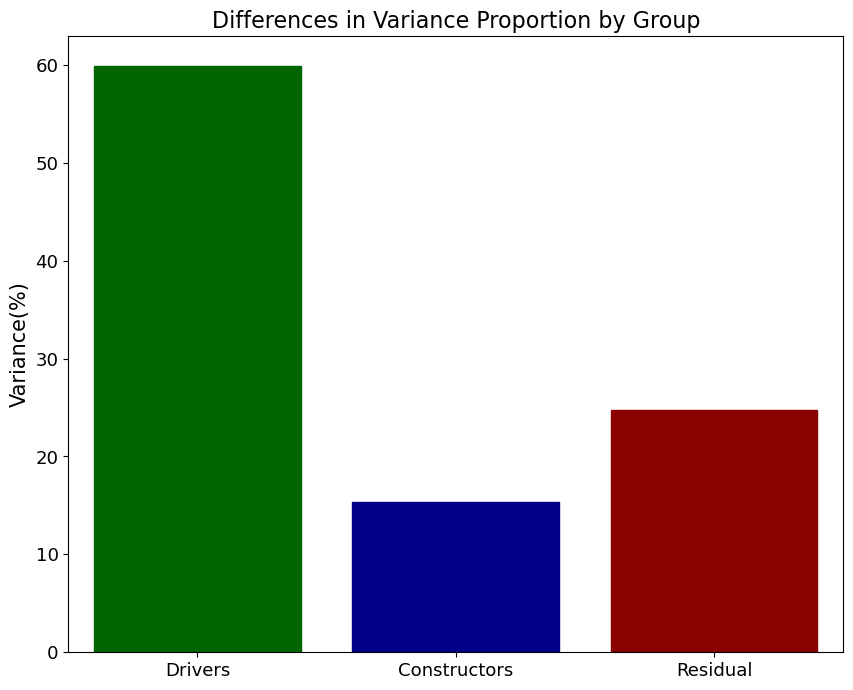

In [553]:
colors = ["darkgreen", "darkblue", "darkred"]

plt.figure(figsize = (10, 8))

ax = sns.barplot(data = variances, x = variances["Group"], y = variances["Variance"])

for bar, color in zip(ax.patches, colors):
    bar.set_color(color)

plt.title("Differences in Variance Proportion by Group", fontsize = 16)
plt.xlabel("")
plt.ylabel("Variance(%)", fontsize = 15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.savefig("differences-in-variance-proportion-by-group.png")